In [12]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import pymysql

from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='Football',
                                         ## You fill these in
                                         ##user='',
                                         ##password='')
    print('maybe')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    pass
    ##if connection.is_connected():
    ##    cursor.close()
    ##    connection.close()
    ##    print("MySQL connection is closed")

print(connection)
cursor.execute("show tables")
record = cursor.fetchall()
print("Tables: ", record)

cursor.execute("Select * from GameData LIMIT 5")
record = cursor.fetchall()
for x in record:
    print(x)

dfGame=pd.DataFrame(record)
#print(dfGame)

dfGame = pd.read_sql('SELECT * FROM GameData', con=connection)
#print(dfgame.describe())

maybe
Connected to MySQL Server version  8.0.29
You're connected to database:  ('football',)
Tables:  [('DriveData',), ('GameData',), ('Games',), ('PlayoffDrives',), ('PlayoffGames',), ('Q5xAA',), ('SBDrives',), ('SBGames',)]
(20000101, 'NYG', 'ARI', 21, 16, 5)
(20000102, 'BAL', 'PIT', 16, 0, 16)
(20000103, 'WSH', 'CAR', 20, 17, 3)
(20000104, 'MIN', 'CHI', 30, 27, 3)
(20000105, 'DET', 'NO', 14, 10, 4)


/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqli

The data type of df is:  <class 'pandas.core.frame.DataFrame'>


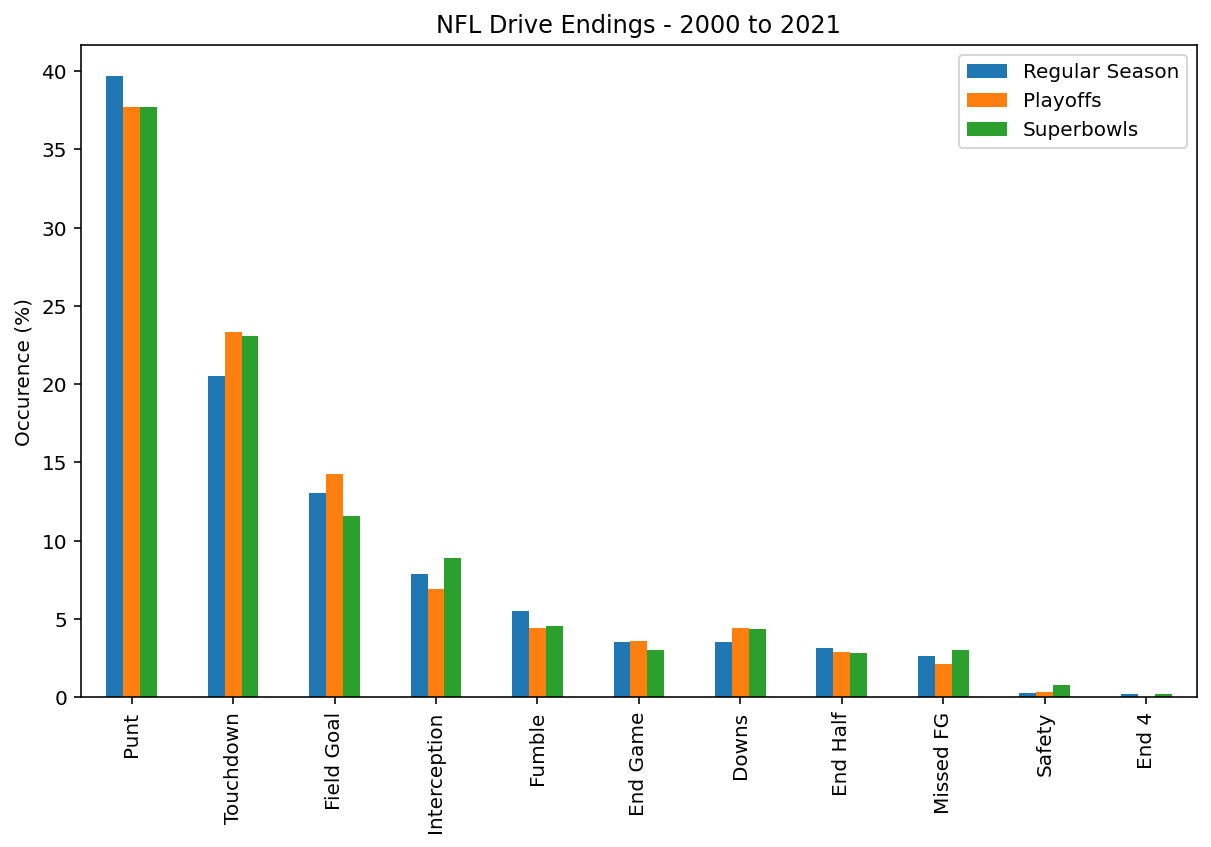

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Obtained    11
num         11
per         11
numPl       11
perPl       11
numSB       11
perSB       11
dtype: int64


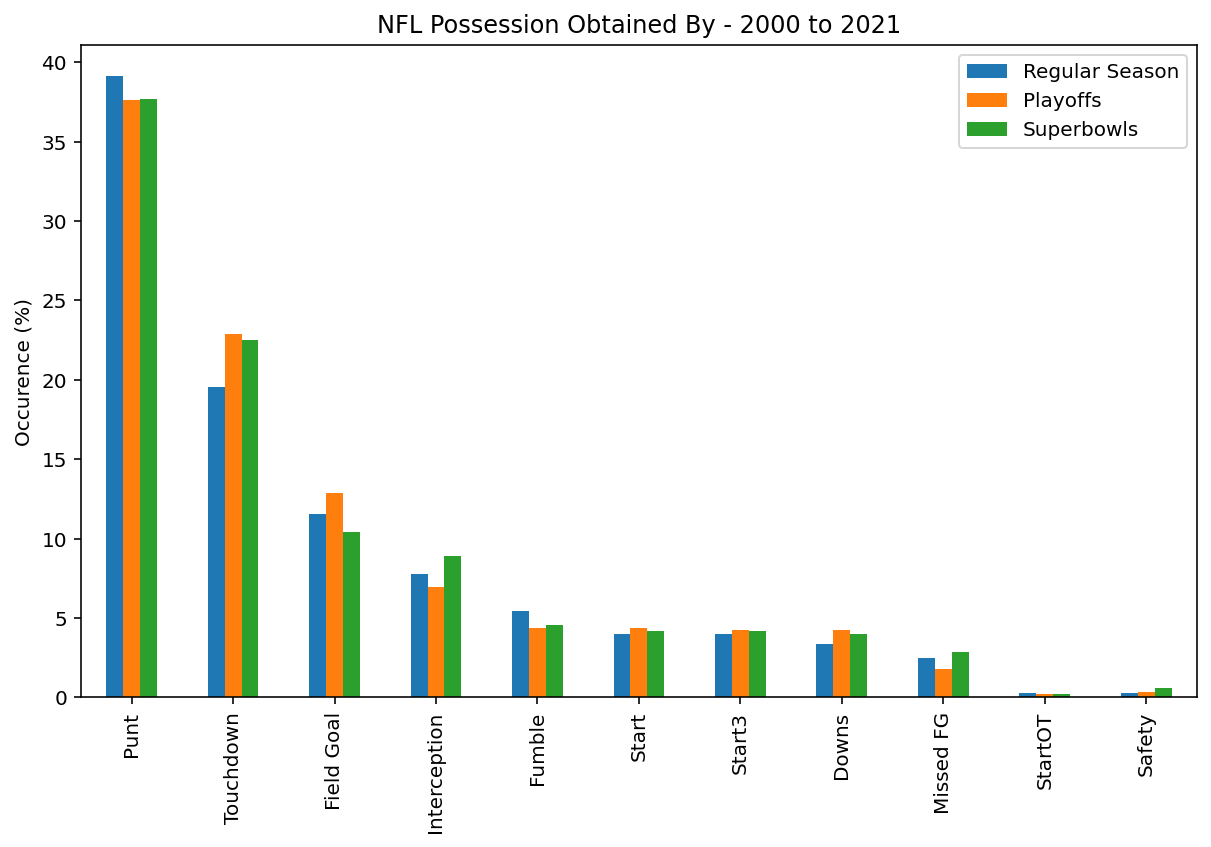

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [13]:
dfDrive = pd.read_sql('SELECT * FROM DriveData', con=connection)

plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

try:
    SQL_Query = pd.read_sql_query(
        '''SELECT HowEnded, Count(HowEnded) AS num,
                Count(HowEnded)*100/(Select COUNT(*) From DriveData) as per 
                FROM DriveData
                Group BY HowEnded                
                ORDER BY per DESC''',connection )

    SQL_QueryPl = pd.read_sql_query(
        '''SELECT HowEnded, Count(HowEnded) AS numPl,
                Count(HowEnded)*100/(Select COUNT(*) From PlayoffDrives) as perPl 
                FROM PlayoffDrives
                Group BY HowEnded
                ORDER BY perPl DESC''',connection )
    SQL_QuerySB = pd.read_sql_query(
        '''SELECT HowEnded, Count(HowEnded) AS numSB,
                Count(HowEnded)*100/(Select COUNT(*) From SBDrives WHERE ID>2000000000) as perSB 
                FROM SBDrives
                WHERE ID>2000000000
                Group BY HowEnded
                ORDER BY perSB DESC''',connection )
    SQL_QueryAddZero = pd.read_sql_query(
        '''SELECT DD1.ID
                FROM DriveData DD1
                RIGHT JOIN (Select Q5GID, MAX(ID) AS ID
                FROM DriveData GROUP BY Q5GID) DD2
                ON DD1.ID=DD2.ID
                AND DD1.Q5GID=DD2.Q5GID
                WHERE QTR IN (4, 5)
                AND HowEnded NOT IN ('End Game','End 4','Touchdown','Field Goal','Safety')''',connection )

    dfwow = pd.DataFrame(SQL_Query, columns=['HowEnded', 'num', 'per'])
    dfwowPl = pd.DataFrame(SQL_QueryPl, columns=['HowEnded', 'numPl', 'perPl'])
    dfwowSB = pd.DataFrame(SQL_QuerySB, columns=['HowEnded', 'numSB', 'perSB'])
    dfwowAZ = pd.DataFrame(SQL_QueryAddZero, columns=['ID'])
    dfwowAZ['NextPts']=0
    ## add a column of zeros for Next Pts in later analysis

    print('The data type of df is: ', type(dfwow))
except:
    print("Error: unable to convert the data")

dftotalpart= pd.merge(dfwow, dfwowPl, on='HowEnded')
dftotal = pd.merge(dftotalpart, dfwowSB, on='HowEnded') 

dfnew=dftotal.drop(['num','numPl', 'numSB'],axis=1)

fig=dfnew.plot.bar(x='HowEnded')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.legend(['Regular Season','Playoffs','Superbowls'])
plt.title('NFL Drive Endings - 2000 to 2021')
plt.xlabel('')
plt.ylabel('Occurence (%)')
plt.show()



SQL_QueryOB = pd.read_sql_query(
        '''SELECT Obtained, Count(Obtained) AS num,
                Count(Obtained)*100/(Select COUNT(*) From DriveData) as per 
                FROM DriveData
                Group BY Obtained                
                ORDER BY per DESC''',connection )

SQL_QueryPlOB = pd.read_sql_query(
        '''SELECT Obtained, Count(Obtained) AS numPl,
                Count(Obtained)*100/(Select COUNT(*) From PlayoffDrives) as perPl 
                FROM PlayoffDrives
                Group BY Obtained
                ORDER BY perPl DESC''',connection )
SQL_QuerySBOB = pd.read_sql_query(
        '''SELECT Obtained, Count(Obtained) AS numSB,
                Count(Obtained)*100/(Select COUNT(*) From SBDrives WHERE ID>2000000000) as perSB 
                FROM SBDrives
                WHERE ID>2000000000
                Group BY Obtained
                ORDER BY perSB DESC''',connection )

dfwowOB = pd.DataFrame(SQL_QueryOB, columns=['Obtained', 'num', 'per'])
dfwowPlOB = pd.DataFrame(SQL_QueryPlOB, columns=['Obtained', 'numPl', 'perPl'])
dfwowSBOB = pd.DataFrame(SQL_QuerySBOB, columns=['Obtained', 'numSB', 'perSB'])
    
dftotalpartOB= pd.merge(dfwowOB, dfwowPlOB, on='Obtained')
dftotalOB = pd.merge(dftotalpartOB, dfwowSBOB, on='Obtained') 
print(dftotalOB.count())

dfnewOB=dftotalOB.drop(['num','numPl', 'numSB'],axis=1)

fig=dfnewOB.plot.bar(x='Obtained')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.legend(['Regular Season','Playoffs','Superbowls'])
plt.title('NFL Possession Obtained By - 2000 to 2021')
plt.xlabel('')
plt.ylabel('Occurence (%)')
plt.show()

dfDrives = pd.read_sql('SELECT * FROM DriveData', con=connection)
#print(dfgame.describe())

#x='HowEnded'
#df1 = df.groupby(x).value_counts(normalize=True)
#df1 = df1.mul(100)
#df1 = df1.rename('percent').reset_index()
#
#g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
#g.ax.set_ylim(0,50)

## set the background style of the plot
#sns.set_style('whitegrid') 
## plot the graph using the default estimator mean
#gg=sns.countplot(x ='HowEnded', data = df, order=df['HowEnded'].value_counts().index)
#plt.title('Drive Endings', fontsize=20)
#total=float(len(df))
#for p in gg.patches:
#    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#    x = p.get_x() + p.get_width()
#    y = p.get_height()
#    gg.annotate(percentage, (x, y),ha='center')
#
#gg.set_xticklabels(gg.get_xticklabels(),rotation=90)
#plt.show()
###print(df[df['HowEnded'].str.contains('fumble', regex=False)])

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


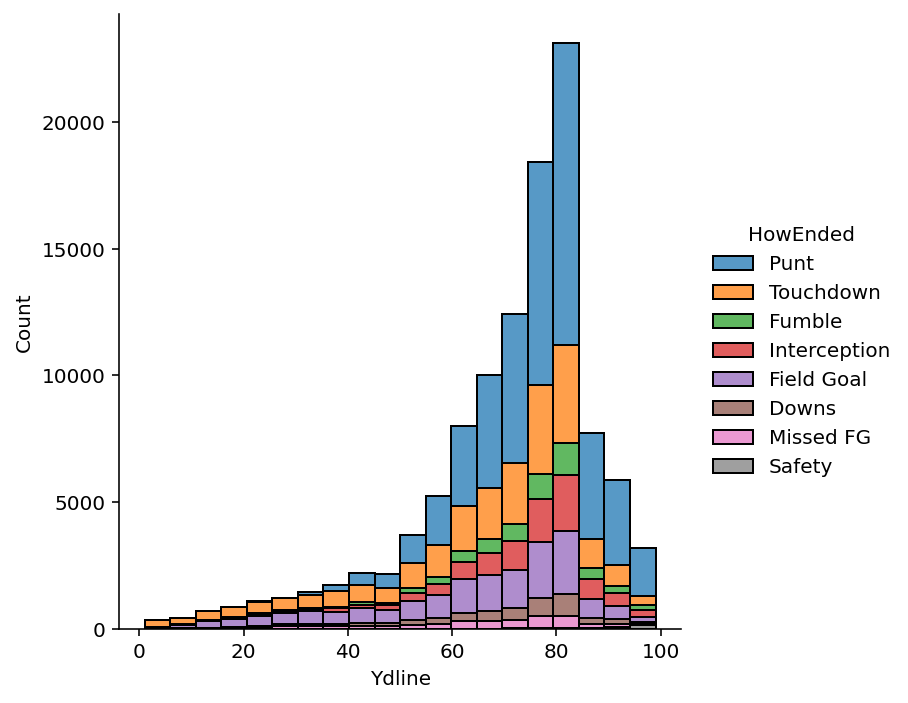

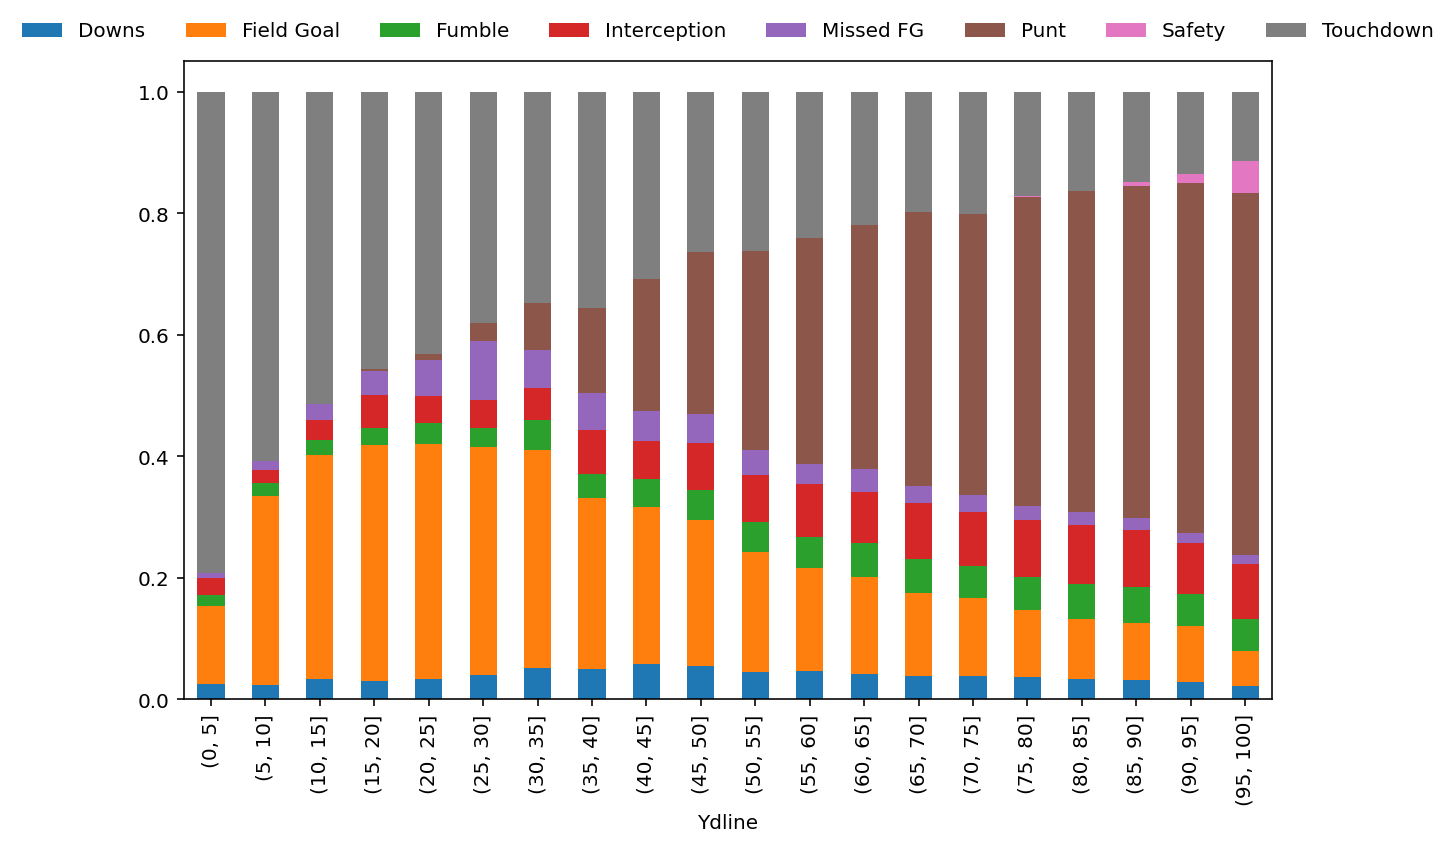

In [14]:
SQL_Query_yds = pd.read_sql_query(
        '''SELECT Ydline, HowEnded 
                FROM DriveData
                Where Plays>0''',connection )

dfwowyds = pd.DataFrame(SQL_Query_yds, columns=['Ydline', 'HowEnded'])
#print(dfwowyds)
dfwowyds=dfwowyds.loc[dfwowyds['HowEnded']!='End Half']
dfwowyds=dfwowyds.loc[dfwowyds['HowEnded']!='End Game']
dfwowyds=dfwowyds.loc[dfwowyds['HowEnded']!='End 4']

ax=sns.displot(dfwowyds, x="Ydline", hue="HowEnded", multiple="stack", bins=20)
#ax.add_legend(label_order = ['Touchdown','Field Goal','Punt','Fumble','Interception','Downs','Missed FG', 'Safety'])


#newdf['YDbins']=pd.cut(x=newdf['Ydline'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
#out=newdf.groupby('YDbins', as_index=False)['NextPts'].mean()

binshh=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
x_var, y_var = "Ydline", "HowEnded"
df_grouped = dfwowyds.groupby(pd.cut(dfwowyds['Ydline'], binshh))[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped.plot.bar(stacked=True)#,['Touchdown','Field Goal','Punt','Fumble','Interception','Downs','Missed FG','Safety'])
plt.legend( #['Touchdown','Field Goal','Punt','Fumble','Interception','Downs','Missed FG', 'Safety'])
    bbox_to_anchor=(0.5, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=11)
plt.tight_layout()

##Next Points Determination
trymerge=pd.DataFrame(
    {"HowEnded":['End Half','End Game','End 4','Touchdown','Field Goal','Safety'],
    "NextPts":[0,0,0,7,3,-2]}, index=[1,2,3,4,5,6])
newdf=pd.merge(dfDrives, trymerge, how='left', on='HowEnded')
newdf2=pd.merge(dfDrives, dfwowAZ, how='left', on='ID')
newdf['NextPts']=newdf['NextPts'].fillna(newdf2['NextPts'])


In [15]:

Atest=newdf.copy()

for i in range(len(Atest)-1):
    up=Atest.loc[len(Atest)-i-1,'NextPts']
    if np.isnan(Atest.loc[len(Atest)-i-2,'NextPts']):
        Atest.loc[len(Atest)-i-2,'NextPts']=(-1)*up

del newdf
newdf=Atest
newdf=newdf.loc[newdf['Plays']>0]
####### DO IT RIGHT HERE for the extraction....  ALSO do above in the visualizations.
#### I am losing information here.... INTs and Fumbles returned for a TD

newdf=newdf.loc[newdf['HowEnded']!='End Half']
newdf=newdf.loc[newdf['HowEnded']!='End Game']
newdf=newdf.loc[newdf['HowEnded']!='End 4']
#print('dsfasdg')
### need to taek out zero play drives.
#print(newdf)
#print(newdf.shape)
#print(newdf.count())
newdf['YDbins']=pd.cut(x=newdf['Ydline'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
out=newdf.groupby('YDbins', as_index=False)['NextPts'].mean()
#print(out)
uuu=np.arange(2.5,100,5)
out['mark']=uuu


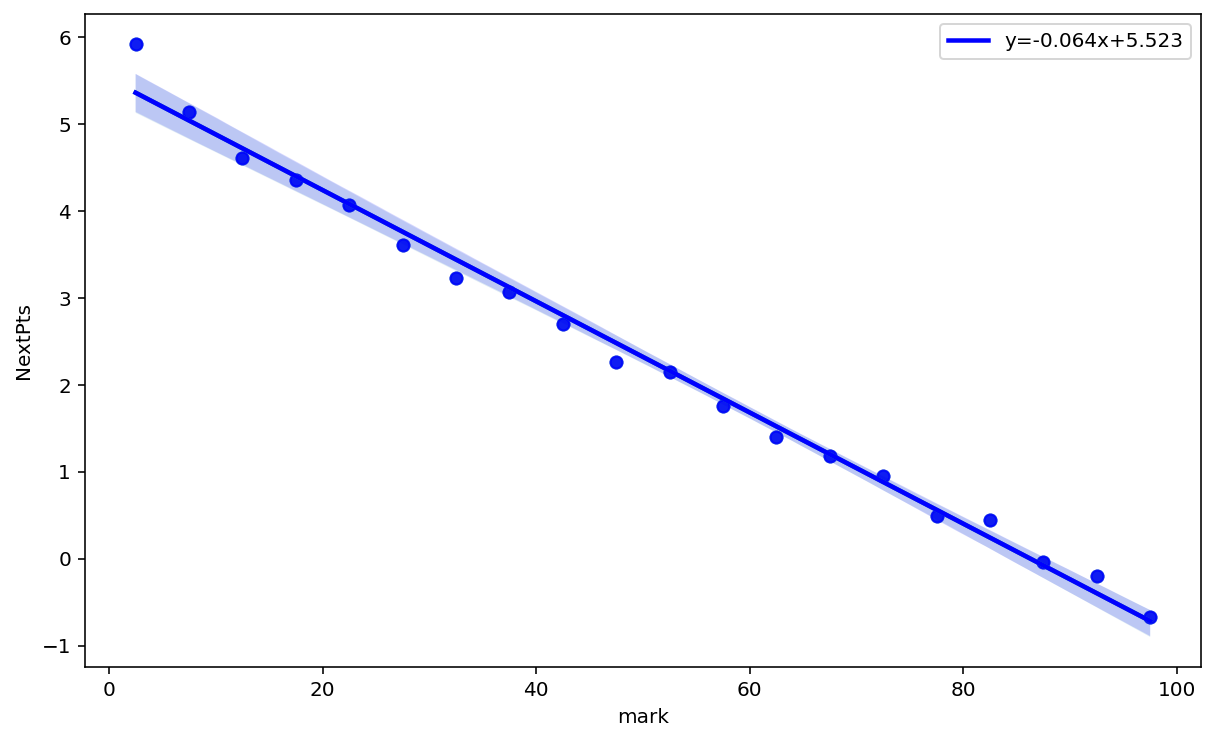

KeyError: 109840

In [16]:
import scipy
from scipy import stats
sns.regplot(x="mark",
                    y="NextPts",
                    data=out)

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(out['mark'],out['NextPts'])
# use line_kws to set line label for legend
ax = sns.regplot(x="mark", y="NextPts", data=out, color='b', 
 line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
# plot legend
ax.legend()
plt.show()

newdf['EP']=newdf['Ydline']*slope+intercept 
#print(newdf)  ### when I do this the 0 row is back to NaN
newdf['EPA']=0

## reindex rows to be sequential. Lines were dropped if zero play drive
newdf=newdf.reset_index(drop=True)
for i in range(len(newdf)):
    newdf.loc[i,'EPA']=-1*(newdf.loc[i+1,'EP']+newdf.loc[i,'EP'])
    if (newdf.loc[i,'HowEnded']=='Touchdown') and (newdf.loc[i,'HowEnded'] in ['Punt','Fumble','Interception']):
        newdf.loc[i,'EPA']=7-newdf.loc[i,'EP']
    else:
        newdf.loc[i,'EPA']=7-slope*78+intercept
    ## Need to add more here

In [11]:
## I think we want to export back to MySQL and run a join query with gamedata 
## and drive data with EPA. Then export back for the data points for the winning team.